In [ ]:
!pip install pmdarima

In [ ]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from pandas_datareader import data as web

In [ ]:
stock_ticker = input()
start = pd.to_datetime(['2008-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-04-01']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
AAPL = pd.read_csv(url)

AAPL


In [ ]:
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,7.116786,7.152143,6.876786,6.958571,5.958445,1079178800
1,2008-01-03,6.978929,7.049643,6.881786,6.961786,5.961198,842066400
2,2008-01-04,6.837500,6.892857,6.388929,6.430357,5.506148,1455832000
3,2008-01-07,6.473214,6.557143,6.079643,6.344286,5.432448,2072193200
4,2008-01-08,6.433571,6.516429,6.100000,6.116071,5.237034,1523816000
...,...,...,...,...,...,...,...
3583,2022-03-25,173.880005,175.279999,172.750000,174.720001,174.720001,80546200
3584,2022-03-28,172.169998,175.729996,172.000000,175.600006,175.600006,90371900
3585,2022-03-29,176.690002,179.009995,176.339996,178.960007,178.960007,100589400
3586,2022-03-30,178.550003,179.610001,176.699997,177.770004,177.770004,92633200


In [ ]:
ma_day = [7,14,28]

for ma in ma_day:
    column_name = "Moving Avg for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

AAPL.tail() 


,Date,Open,High,Low,Close,Adj Close,Volume,Moving Avg for 7 days,Moving Avg for 14 days,Moving Avg for 28 days
3583,2022-03-25,173.880005,175.279999,172.750000,174.720001,174.720001,80546200,168.257145,162.624286,164.065001
3584,2022-03-28,172.169998,175.729996,172.000000,175.600006,175.600006,90371900,170.397147,163.921429,164.165358
3585,2022-03-29,176.690002,179.009995,176.339996,178.960007,178.960007,100589400,172.537149,165.065001,164.394287
3586,2022-03-30,178.550003,179.610001,176.699997,177.770004,177.770004,92633200,174.307148,166.440001,164.711787
3587,2022-03-31,177.839996,178.029999,174.399994,174.610001,174.610001,103049300,175.134290,167.860002,164.972858


In [ ]:
pip install ta

  Created wheel for ta: filename=ta-0.10.1-py3-none-any.whl size=28985 sha256=b90007e1bdbf7a7936793537f8ac0548fa7d2d0a57daf016e5ca276e00b45748
  Stored in directory: /root/.cache/pip/wheels/bc/2a/c2/a56e77d07edc16a1fa7fb012667e55cb0643cfa65996bddecc
Successfully built ta


In [ ]:

from ta import add_all_ta_features
from ta.utils import dropna
mom_data = add_all_ta_features(AAPL, open='Open', high='High', low='Low', close='Close', volume='Volume')
mom_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Moving Avg for 7 days', 'Moving Avg for 14 days',
       'Moving Avg for 28 days', 'volume_adi', 'volume_obv', 'volume_cmf',
       'volume_fi', 'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_vwap',
       'volume_mfi', 'volume_nvi', 'volatility_bbm', 'volatility_bbh',
       'volatility_bbl', 'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend

In [ ]:
AAPL.set_index('Date',inplace=True)

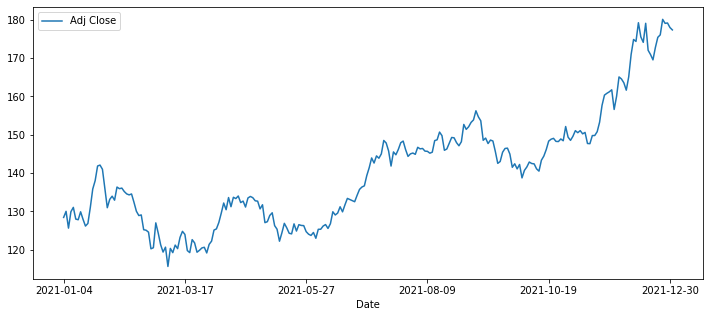

In [ ]:
# Plotting the stock's adjusted closing price using pandas
AAPL.truncate(before='2021-01-01', after='2022-01-01')['Adj Close'].plot(legend=True,figsize=(12,5))

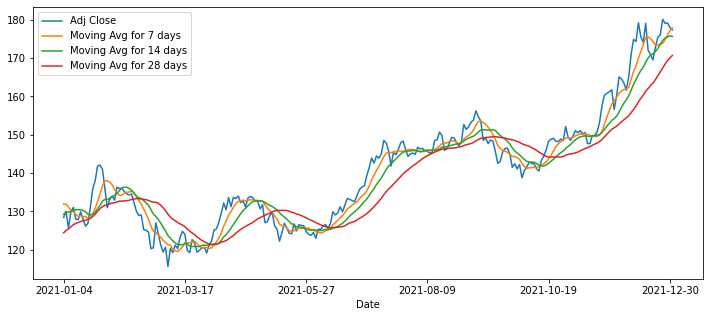

In [ ]:
AAPL.truncate(before='2021-01-01', after='2022-01-01')[['Adj Close','Moving Avg for 7 days','Moving Avg for 14 days','Moving Avg for 28 days']].plot(subplots=False,figsize=(12,5))

### Moving Average graph shows that Apple had low stock prices around March-April due to 2nd COVID wave but it increased for rest of the year

#***Daily return average of stocks***

#### i.e. how much gain / lost for a particular stock per day

In [ ]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

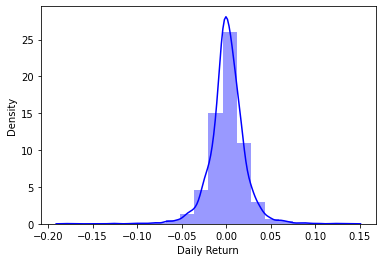

In [ ]:
import seaborn as sns
sns.distplot(AAPL['Daily Return'].dropna(),bins=20,color='blue')

In [ ]:
stock_ticker = input()
start = pd.to_datetime(['2008-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-04-01']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
MSFT = pd.read_csv(url)

MSFT


In [ ]:
MSFT

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-01-02,35.790001,35.959999,35.000000,35.220001,26.044235,63004200
1,2008-01-03,35.220001,35.650002,34.860001,35.369999,26.155159,49599600
2,2008-01-04,35.189999,35.200001,34.090000,34.380001,25.423075,72090800
3,2008-01-07,34.549999,34.799999,34.250000,34.610001,25.593166,80164300
4,2008-01-08,34.709999,34.709999,33.400002,33.450001,24.735374,79148300
...,...,...,...,...,...,...,...
3583,2022-03-25,305.230011,305.500000,299.290009,303.679993,303.679993,22566500
3584,2022-03-28,304.329987,310.799988,304.329987,310.700012,310.700012,29578200
3585,2022-03-29,313.910004,315.820007,309.049988,315.410004,315.410004,30393400
3586,2022-03-30,313.760010,315.950012,311.579987,313.859985,313.859985,28163600


In [ ]:
MSFT['Symbol'] = np.arange(len(MSFT))
MSFT

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2008-01-02,35.790001,35.959999,35.000000,35.220001,26.044235,63004200,0
1,2008-01-03,35.220001,35.650002,34.860001,35.369999,26.155159,49599600,1
2,2008-01-04,35.189999,35.200001,34.090000,34.380001,25.423075,72090800,2
3,2008-01-07,34.549999,34.799999,34.250000,34.610001,25.593166,80164300,3
4,2008-01-08,34.709999,34.709999,33.400002,33.450001,24.735374,79148300,4
...,...,...,...,...,...,...,...,...
3583,2022-03-25,305.230011,305.500000,299.290009,303.679993,303.679993,22566500,3583
3584,2022-03-28,304.329987,310.799988,304.329987,310.700012,310.700012,29578200,3584
3585,2022-03-29,313.910004,315.820007,309.049988,315.410004,315.410004,30393400,3585
3586,2022-03-30,313.760010,315.950012,311.579987,313.859985,313.859985,28163600,3586


In [ ]:
stock_ticker = input()
start = pd.to_datetime(['2008-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-04-01']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
AMZN = pd.read_csv(url)

AMZN


In [ ]:
AMZN['Symbol'] = np.arange(len(AMZN))
AMZN

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2008-01-02,95.349998,97.430000,94.699997,96.250000,96.250000,13858700,0
1,2008-01-03,96.059998,97.250000,94.519997,95.209999,95.209999,9122500,1
2,2008-01-04,93.260002,93.400002,88.500000,88.790001,88.790001,10270000,2
3,2008-01-07,88.620003,90.570000,85.470001,88.820000,88.820000,9981600,3
4,2008-01-08,87.550003,91.830002,86.930000,87.879997,87.879997,12283300,4
...,...,...,...,...,...,...,...,...
3583,2022-03-25,3280.000000,3307.370117,3245.000000,3295.469971,3295.469971,2451600,3583
3584,2022-03-28,3299.500000,3380.750000,3298.000000,3379.810059,3379.810059,2992700,3584
3585,2022-03-29,3407.679932,3416.629883,3357.370117,3386.300049,3386.300049,3307700,3585
3586,2022-03-30,3370.189941,3379.010010,3310.000000,3326.020020,3326.020020,2808400,3586


In [ ]:
stock_ticker = input()
start = pd.to_datetime(['2008-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-04-01']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
GOOG = pd.read_csv(url)

GOOG


In [ ]:
GOOG['Symbol'] = np.arange(len(GOOG))
GOOG

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2008-01-02,345.141327,347.382935,337.599579,341.315674,341.315674,8646087,0
1,2008-01-03,341.350525,342.142578,336.996857,341.385406,341.385406,6529382,1
2,2008-01-04,338.575928,339.208557,326.277039,327.273285,327.273285,10759780,2
3,2008-01-07,325.749023,329.903442,317.484985,323.412781,323.412781,12854803,3
4,2008-01-08,325.280762,328.747772,314.321838,314.660583,314.660583,10718225,4
...,...,...,...,...,...,...,...,...
3583,2022-03-25,2835.080078,2839.189941,2793.989990,2830.429932,2830.429932,963500,3583
3584,2022-03-28,2813.689941,2839.530029,2796.562988,2839.000000,2839.000000,1188700,3584
3585,2022-03-29,2863.209961,2883.250000,2849.679932,2865.000000,2865.000000,1433900,3585
3586,2022-03-30,2857.399902,2869.610107,2843.360107,2852.889893,2852.889893,1052300,3586


In [ ]:
stock_ticker = input()
start = pd.to_datetime(['2008-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-04-01']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
AAPL2 = pd.read_csv(url)

AAPL


In [ ]:
AAPL2['Symbol'] = np.arange(len(AAPL2))
AAPL2


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2008-01-02,7.116786,7.152143,6.876786,6.958571,5.958446,1079178800,0
1,2008-01-03,6.978929,7.049643,6.881786,6.961786,5.961196,842066400,1
2,2008-01-04,6.837500,6.892857,6.388929,6.430357,5.506149,1455832000,2
3,2008-01-07,6.473214,6.557143,6.079643,6.344286,5.432449,2072193200,3
4,2008-01-08,6.433571,6.516429,6.100000,6.116071,5.237032,1523816000,4
...,...,...,...,...,...,...,...,...
3583,2022-03-25,173.880005,175.279999,172.750000,174.720001,174.720001,80546200,3583
3584,2022-03-28,172.169998,175.729996,172.000000,175.600006,175.600006,90371900,3584
3585,2022-03-29,176.690002,179.009995,176.339996,178.960007,178.960007,100589400,3585
3586,2022-03-30,178.550003,179.610001,176.699997,177.770004,177.770004,92633200,3586


In [ ]:
ticker_list = [AAPL,FB, AMZN, GOOG]
data = []
for ticker in ticker_list:
    # Creating an empty dataframe to transfer data from data variable
    ticker_data = pd.DataFrame()
    # 2021 data
    ticker_data = ticker.truncate(before='2021-01-01', after='2022-01-01')[['Adj Close','Symbol']]
    ticker_data.reset_index()
    data.append(ticker_data)

In [ ]:
len(data)

4

#### dataframe with adjusted closing prices of all 4 companies

In [ ]:
data = [AAPL2["Symbol"],AAPL2["Date"],AAPL["Adj Close"],MSFT["Adj Close"],AMZN["Adj Close"],GOOG["Adj Close"]]

headers = ["Symbol", "Date","AAPL","MSFT","AMZN","GOOG"]

dfrm = pd.concat(data, axis=1, keys=headers)
dfrm

,Symbol,Date,AAPL,MSFT,AMZN,GOOG
0,0,2008-01-02,5.958446,26.044235,96.250000,341.315674
1,1,2008-01-03,5.961198,26.155159,95.209999,341.385406
2,2,2008-01-04,5.506149,25.423075,88.790001,327.273285
3,3,2008-01-07,5.432447,25.593166,88.820000,323.412781
4,4,2008-01-08,5.237035,24.735374,87.879997,314.660583
...,...,...,...,...,...,...
3583,3583,2022-03-25,174.720001,303.679993,3295.469971,2830.429932
3584,3584,2022-03-28,175.600006,310.700012,3379.810059,2839.000000
3585,3585,2022-03-29,178.960007,315.410004,3386.300049,2865.000000
3586,3586,2022-03-30,177.770004,313.859985,3326.020020,2852.889893


In [ ]:
corr_df = dfrm.corr(method='pearson')
corr_df.pop("Symbol")
# reset symbol as index (rather than 0-X)
corr_df.head().reset_index()
# del corr_df.index.name
corr_df.head(10)

,AAPL,MSFT,AMZN,GOOG
Symbol,0.825788,0.834301,0.884828,0.872816
AAPL,1.000000,0.986663,0.956869,0.972419
MSFT,0.986663,1.000000,0.973295,0.980094
AMZN,0.956869,0.973295,1.000000,0.955420
GOOG,0.972419,0.980094,0.955420,1.000000


In [ ]:
corr_df = corr_df.drop(corr_df.index[0])
corr_df

,AAPL,MSFT,AMZN,GOOG
AAPL,1.000000,0.986663,0.956869,0.972419
MSFT,0.986663,1.000000,0.973295,0.980094
AMZN,0.956869,0.973295,1.000000,0.955420
GOOG,0.972419,0.980094,0.955420,1.000000


### heat map to compare which pair of companies stock prices  are doing proportionally well(postively correlated) &  which are negatively correlated

<Figure size 432x288 with 0 Axes>

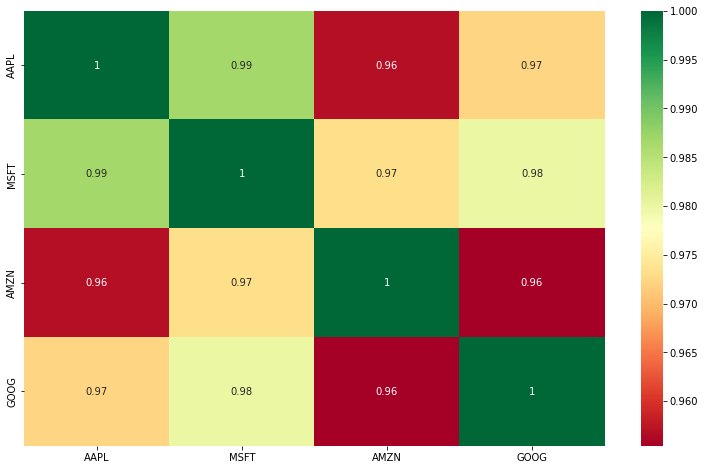

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(13, 8))
sns.heatmap(corr_df, annot=True, cmap="RdYlGn")
plt.figure()

Text(0, 0.5, 'Daily Percentage Return')

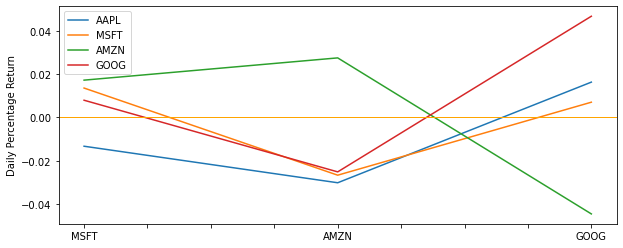

In [ ]:
df_2=corr_df.pct_change()
df_2.plot(figsize=(10,4))
plt.axhline(0, color='orange', lw=1)
plt.ylabel('Daily Percentage Return')

## How much risk in investing on stocks ?

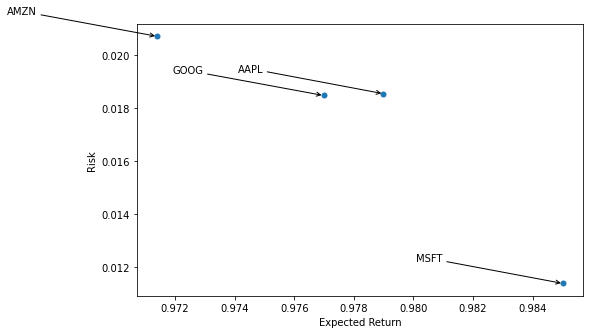

In [ ]:
risk = corr_df.dropna()
plt.figure(figsize=(8,5))

plt.scatter(risk.mean(),risk.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(risk.columns,risk.mean(),risk.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=0.'))

### Stock Price Prediction of Amazon using ARIMA Model

/------------------------------------------------------------------------------------


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
stock_ticker = input()
start = pd.to_datetime(['2014-09-25']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2022-04-01']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + stock_ticker + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)
df

AMZN


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-25,327.989990,328.540009,321.399994,321.929993,321.929993,2928800
1,2014-09-26,320.600006,323.500000,317.640015,323.209991,323.209991,3638000
2,2014-09-29,320.500000,323.750000,319.000000,321.820007,321.820007,1924600
3,2014-09-30,321.359985,323.429993,318.510010,322.440002,322.440002,2636200
4,2014-10-01,322.040009,322.170013,315.549988,317.459991,317.459991,3089100
...,...,...,...,...,...,...,...
1888,2022-03-25,3280.000000,3307.370117,3245.000000,3295.469971,3295.469971,2451600
1889,2022-03-28,3299.500000,3380.750000,3298.000000,3379.810059,3379.810059,2992700
1890,2022-03-29,3407.679932,3416.629883,3357.370117,3386.300049,3386.300049,3307700
1891,2022-03-30,3370.189941,3379.010010,3310.000000,3326.020020,3326.020020,2808400


In [ ]:
df = df[['Date','Close']] 
df.shape

(1893, 2)

In [ ]:
df['Date'] = pd.to_datetime(df.Date, format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1893 non-null   datetime64[ns]
 1   Close   1893 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 29.7 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


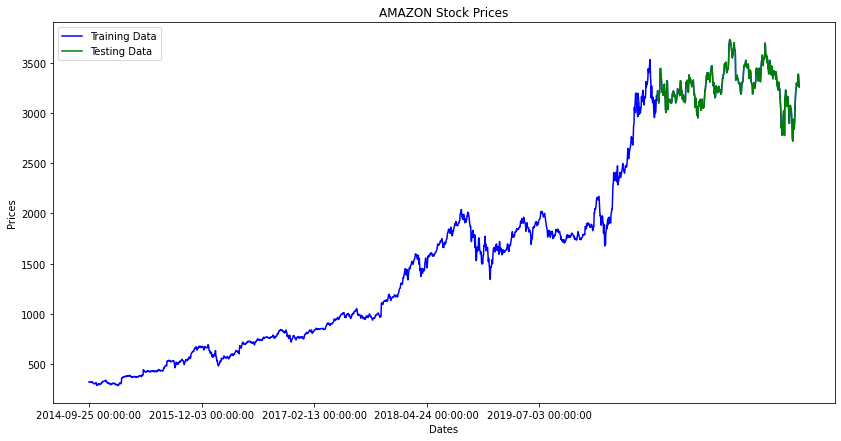

In [ ]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(14,7))
plt.title('AMAZON Stock Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1500, 300), df['Date'][0:1500:300])
plt.legend()

In [ ]:
# Check if price series is stationary
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Close.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -0.42775387901614204
p-value: 0.9053607270147097


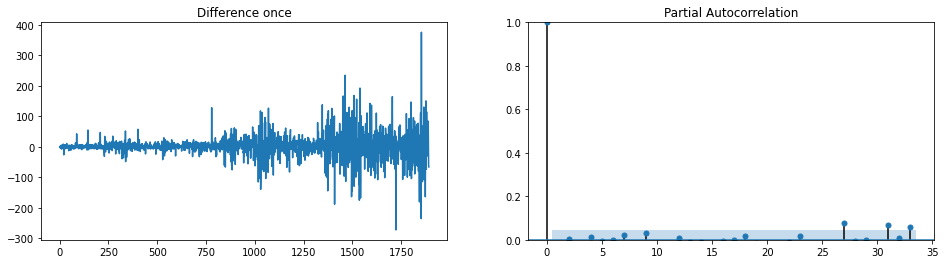

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

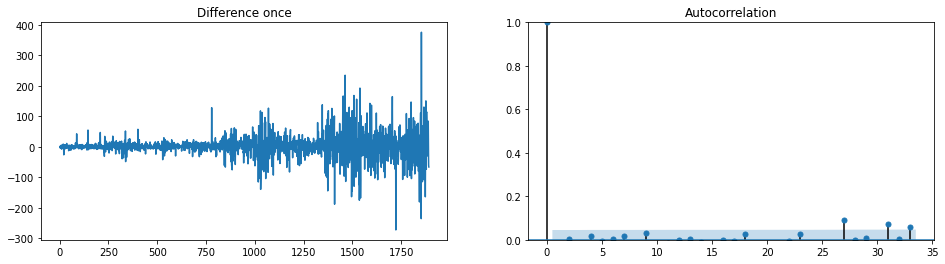

In [ ]:
#q
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

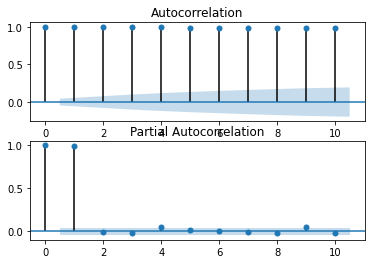

In [ ]:
dataset=df.copy()
dataset.set_index('Date', inplace=True)
dataset = dataset[['Close']] 
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(dataset, ax=pyplot.gca(),lags=10)
pyplot.subplot(212)
plot_pacf(dataset, ax=pyplot.gca(),lags=10)
pyplot.show()

In order to evaluate the ARIMA model,use two different error functions: Mean Squared Error (MSE) and Symmetric Mean Absolute Percentage Error (SMAPE). SMAPE is commonly used as an accuracy measure based on relative errors.

In [ ]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [ ]:
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(2,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 3843.696
Symmetric mean absolute percentage error: 6.272


In [ ]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1891
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -9570.047
Method:                       css-mle   S.D. of innovations             38.164
Date:                Fri, 29 Apr 2022   AIC                          19150.093
Time:                        04:51:04   BIC                          19177.818
Sample:                             1   HQIC                         19160.302
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5884      0.872      1.822      0.069      -0.120       3.297
ar.L1.D.y     -0.6275      0.159     -3.948      0.000      -0.939      -0.316
ar.L2.D.y      0.0161      0.025      0.645      0.5

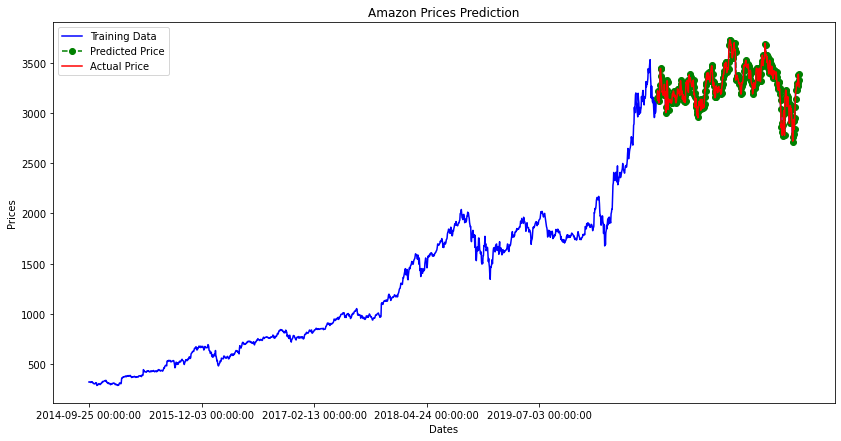

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.title('Amazon Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1500, 300), df['Date'][0:1500:300])
plt.legend()

[array([3151.18504121]), array([3148.47606856]), array([3218.7958168]), array([3136.18282557]), array([3191.49879437]), array([3115.12185888]), array([3182.52401555]), array([3199.45497262]), array([3275.87718572]), array([3437.31262465]), array([3450.09594943]), array([3370.85888267]), array([3340.50796339]), array([3280.01689815]), array([3211.45780795]), array([3216.8076232]), array([3190.37043605]), array([3177.25582847]), array([3204.65389329]), array([3209.75298885]), array([3282.06129157]), array([3178.22628879]), array([3202.24503643]), array([3059.84414622]), array([2997.10762586]), array([3049.28021286]), array([3228.39157202]), array([3328.87162579]), array([3313.84142494]), array([3156.43960491]), array([3033.56634531]), array([3131.87299193]), array([3119.10638413]), array([3125.69041851]), array([3135.49951765]), array([3136.04346581]), array([3109.98166484]), array([3116.37162353]), array([3103.75232051]), array([3098.78577356]), array([3119.38439283]), array([3183.45500

In [ ]:

  
# creating the dataframe of predicted prices
arima_pred_df = pd.DataFrame(data = predictions)
arima_pred_df.columns = ["predicted prices"]

In [ ]:
arima_pred_df

,predicted prices
0,3151.185041
1,3148.476069
2,3218.795817
3,3136.182826
4,3191.498794
...,...
374,3271.829233
375,3298.125150
376,3378.859786
377,3390.762784


In [ ]:
arima_pred_df['Date'] = df['Date'].tail(379).values

In [ ]:
arima_pred_df

,predicted prices,Date
0,3151.185041,2020-09-30
1,3148.476069,2020-10-01
2,3218.795817,2020-10-02
3,3136.182826,2020-10-05
4,3191.498794,2020-10-06
...,...,...
374,3271.829233,2022-03-25
375,3298.125150,2022-03-28
376,3378.859786,2022-03-29
377,3390.762784,2022-03-30


In [ ]:

# saving the dataframe
arima_pred_df.to_csv('arima.csv')